<a href="https://colab.research.google.com/github/tanvirlongia/Adult-Census-Income/blob/main/Adult_Income_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Adult Income Dataset

In [ ]:
import pandas as pd

url = 'https://drive.google.com/file/d/15TYvrhwZl8PqHrYpxa6fTS88fwOzIIxi/view?usp=sharing'

path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]

data = pd.read_csv(path)
df = pd.read_csv(path)

In [ ]:
# COMBINED CODE
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV


# Logistic Regression
X_logreg = df[['age', 'education.num', 'fnlwgt', 'marital.status', 'education', 'sex']]
y_logreg = df['income']

X_train_logreg, X_test_logreg, y_train_logreg, y_test_logreg = train_test_split(X_logreg, y_logreg, test_size=0.2, random_state=42)

numeric_features_logreg = ['age', 'education.num', 'fnlwgt']
categorical_features_logreg = ['marital.status', 'education', 'sex']

numeric_transformer_logreg = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer_logreg = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor_logreg = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer_logreg, numeric_features_logreg),
        ('cat', categorical_transformer_logreg, categorical_features_logreg)
    ])

pipeline_logreg = Pipeline(steps=[('preprocessor', preprocessor_logreg),
                           ('classifier', LogisticRegression(max_iter=1000))])

pipeline_logreg.fit(X_train_logreg, y_train_logreg)

y_pred_logreg = pipeline_logreg.predict(X_test_logreg)

accuracy_logreg = accuracy_score(y_test_logreg, y_pred_logreg)
print("Logistic Regression Accuracy:", accuracy_logreg)

# K-Nearest Neighbors
selected_columns_knn = ['age', 'fnlwgt', 'education', 'sex', 'marital.status', 'income', 'education.num']
df_knn = df[selected_columns_knn]

categorical_cols_knn = ['education', 'sex', 'marital.status']
encoder_knn = OneHotEncoder(drop='first', sparse_output=False)
X_encoded_knn = encoder_knn.fit_transform(df_knn[categorical_cols_knn])
encoded_cols_knn = encoder_knn.get_feature_names_out(categorical_cols_knn)
X_encoded_knn = pd.DataFrame(X_encoded_knn, columns=encoded_cols_knn)

df_knn = df_knn.drop(columns=categorical_cols_knn)

df_knn = pd.concat([df_knn, X_encoded_knn], axis=1)

X_knn = df_knn.drop('income', axis=1)
y_knn = df_knn['income']

X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X_knn, y_knn, test_size=0.15, random_state=42)

knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train_knn, y_train_knn)

y_pred_knn = knn.predict(X_test_knn)

accuracy_knn = accuracy_score(y_test_knn, y_pred_knn)
print("KNN Accuracy:", accuracy_knn)

# Decision Tree
predictors_dt = ['marital.status', 'education', 'education.num', 'age', 'sex', 'fnlwgt']
X_dt = df[predictors_dt]
y_dt = df['income']

X_dt = pd.get_dummies(X_dt)

X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X_dt, y_dt, test_size=0.2, random_state=42)

dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_dt, y_train_dt)

y_pred_dt = dt_classifier.predict(X_test_dt)

param_grid_dt = {
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_dt = GridSearchCV(dt_classifier, param_grid_dt, cv=5, scoring='accuracy')

grid_search_dt.fit(X_train_dt, y_train_dt)
best_model_dt = grid_search_dt.best_estimator_
y_pred_best_dt = best_model_dt.predict(X_test_dt)

accuracy_best_dt = accuracy_score(y_test_dt, y_pred_best_dt)
print("Decision tree Accuracy:", accuracy_best_dt)


Logistic Regression Accuracy: 0.8180561953017043
KNN Accuracy: 0.75496417604913
Decision tree Accuracy: 0.8238906801781053


In [ ]:
#HYPERPARAMETERS FOR DECIDION TREE
best_params_dt = grid_search_dt.best_params_
print("Best Hyperparameters:", best_params_dt)

accuracy_dt = accuracy_score(y_test_dt, y_pred_dt)
print("Accuracy without hyperparameters:", accuracy_dt)

accuracy_best_dt = accuracy_score(y_test_dt, y_pred_best_dt)
print("Accuracy with Best Hyperparameters:", accuracy_best_dt)

Best Hyperparameters: {'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 2}
Accuracy without hyperparameters: 0.7647781360356211
Accuracy with Best Hyperparameters: 0.8238906801781053


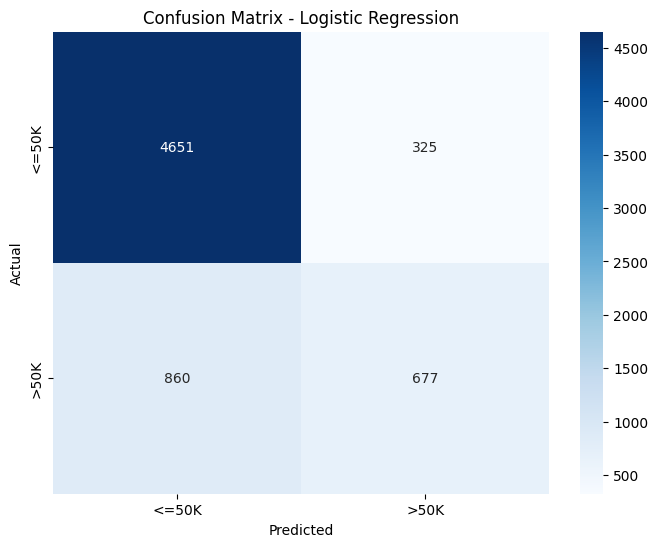

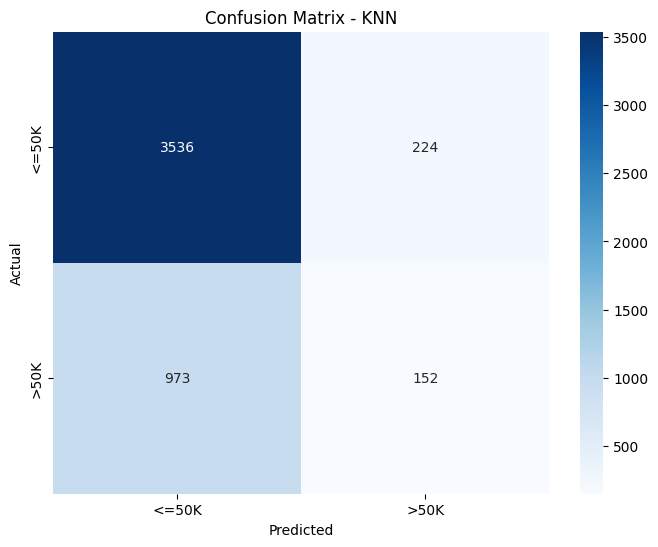

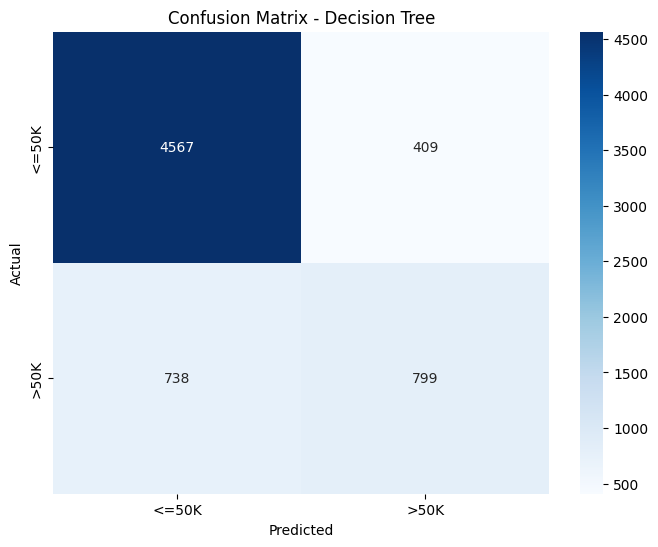

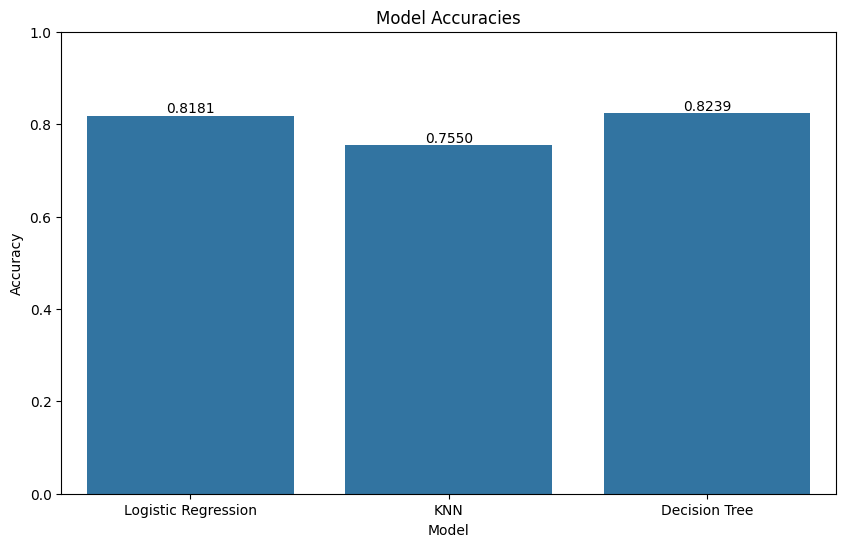

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion Matrix and Heatmap for Logistic Regression
cm_logreg = confusion_matrix(y_test_logreg, y_pred_logreg)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_logreg, annot=True, fmt="d", cmap="Blues", xticklabels=['<=50K', '>50K'], yticklabels=['<=50K', '>50K'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

# Confusion Matrix and Heatmap for K-Nearest Neighbors
cm_knn = confusion_matrix(y_test_knn, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues", xticklabels=['<=50K', '>50K'], yticklabels=['<=50K', '>50K'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - KNN')
plt.show()

# Confusion Matrix and Heatmap for Decision Tree
cm_dt = confusion_matrix(y_test_dt, y_pred_best_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues", xticklabels=['<=50K', '>50K'], yticklabels=['<=50K', '>50K'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

# Bar graph comparing accuracies
models = ['Logistic Regression', 'KNN', 'Decision Tree']
accuracies = [accuracy_logreg, accuracy_knn, accuracy_best_dt]

plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=models, y=accuracies)
plt.ylim(0, 1)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracies')
for index, value in enumerate(accuracies):
    barplot.text(index, value, '{:.4f}'.format(value), ha="center", va="bottom", fontsize=10)

plt.show()

